# Predicting Heart Disease in Patients Using A KNN Classification Model 

### Introduction:
Heart disease is the leading cause of death worldwide. Early diagnosis and treatment of heart disease is crucial to improve patients' outcomes and quality of life. Classification can help healthcare professionals more accurately and promptly diagnose heart disease. In this project, we aim to use the Heart Disease dataset from the UCI Machine Learning Repository to build a k-NN classification model to predict whether a patient has heart disease using the patient’s cholesterol levels, age, maximum heart rate they can achieve, and resting blood pressure. The Heart Disease dataset contains 303 instances and 14 attributes. 

### Methods:
We will be using K-NN classification to predict heart disease using the predictors: resting blood pressure (trestbps), age (age), cholesterol levels (chol) and maximum heart rate achieved (thalach). We will perform the following steps to perform the preliminary exploratory data analysis:
   
1. Clean and wrangle data into tidy format: Handle missing values, preprocess the data by scaling, normalizing, and encoding data to correct data type
    
2. Split the data into training and testing sets: We will use the training data set to create the table and visualizations listed below.
    
3. Summarize Data into Table: We will make a table with columns only of the predictor values we chose as well as the “num” column that shows the diagnosis of the patient from integer values of 0-4. We then will use the “mutate” function with the “ifelse” argument to add another column that uses the values from the “num” column to tell us “no” if a patient does not have heart disease (num = 0), and “yes” if a patient has heart disease (num = 1- 4). We will also make a summary table to tell us the count of how many people in the dataset are diagnosed with heart disease. 
    
4. Visualize Data: We will create 3 scatter plots with age for the y-axis for all, and cholesterol levels, maximum heart rate achieved, and resting blood pressure for the x-axis, respectively. We will color the points according to the diagnosis of heart disease (yes or no). 
    
### Expected outcomes and significance:

1. We would expect that patients with high cholesterol levels, old age, high resting blood pressure and a high maximum heart rate, will have heart disease. 
    
2. By developing a classification model for the Heart Disease dataset, we hope to contribute to the development of more effective diagnosis, which in turn can improve healthcare solutions for heart disease patients.
    
3. Future questions: If a patient is diagnosed with heart disease, what stage of heart disease are they at and specifically what heart disease is it? What treatment plans would be best for the patient, considering the stage of heart disease they have been diagnosed with?  


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

options(repr.matrix.max.rows = 6)
install.packages("GGally")
install.packages("kknn")



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.1.3”
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ pars

Import heart data from web:

In [2]:
name <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heartdata <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = name) |>
    select(age, trestbps, chol, thalach,num)

heartdata

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,150,0
67,160,286,108,2
67,120,229,129,1
⋮,⋮,⋮,⋮,⋮
57,130,131,115,3
57,130,236,174,1
38,138,175,173,0


Categorize different heart diseases into only two categories: either have it or not:

In [3]:
heartdata <- heartdata |>
    mutate(heart_disease = ifelse(num > 0, "yes", "no"))

heartdata

age,trestbps,chol,thalach,num,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,0,no
67,160,286,108,2,yes
67,120,229,129,1,yes
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,3,yes
57,130,236,174,1,yes
38,138,175,173,0,no


Split data frame to obtain trainning and testing data:

In [4]:
set.seed(2023)
heart_split <- initial_split(heartdata, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

Data visualization:

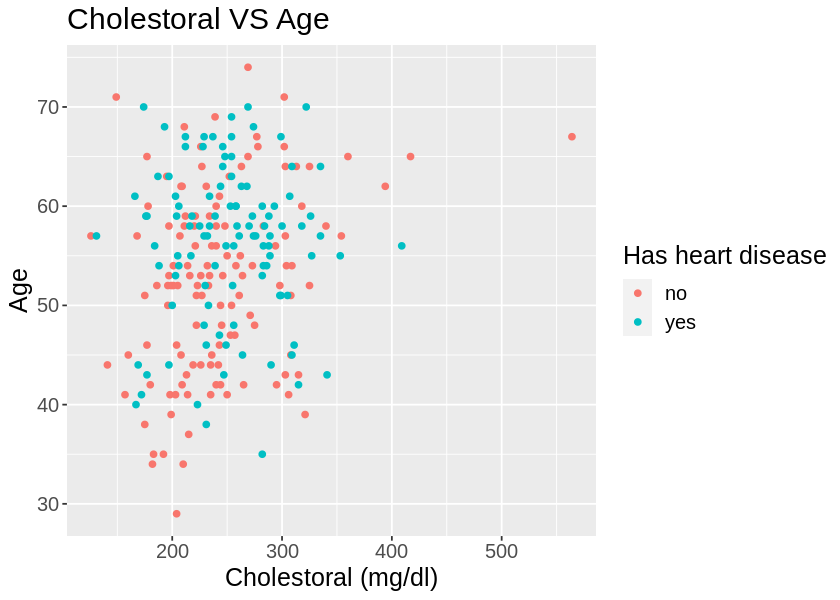

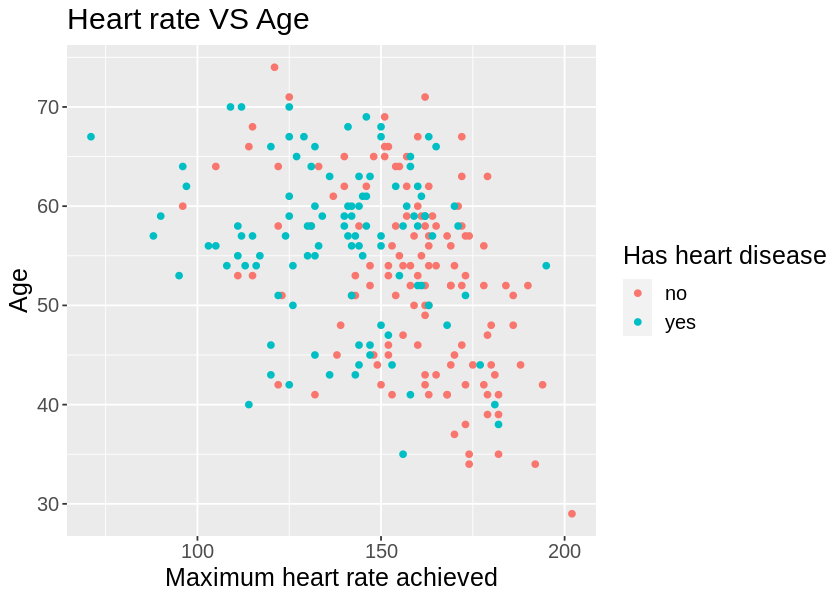

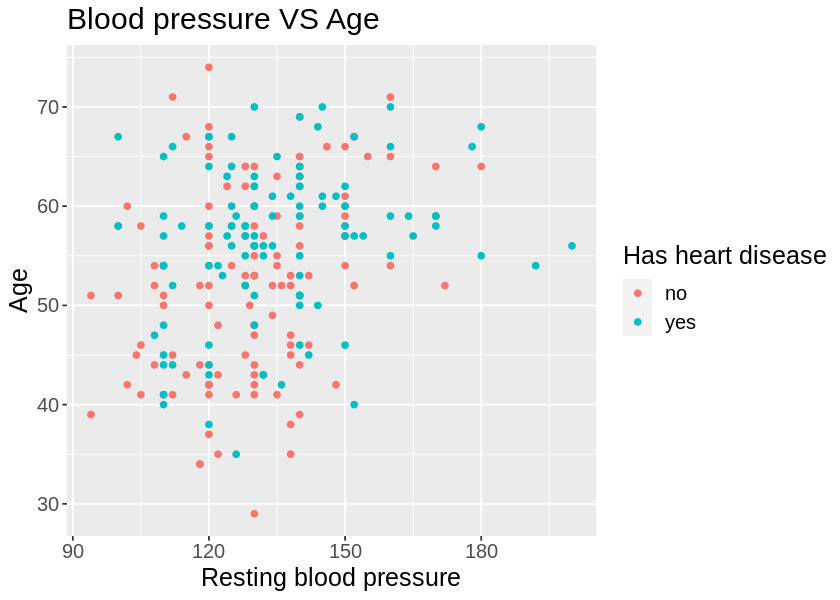

In [5]:
options(repr.plot.width = 7, repr.plot.height = 5)

p1 <- heart_train |>  
    ggplot(aes(x= chol, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Cholestoral (mg/dl)",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15)) +
        ggtitle("Cholestoral VS Age")

p2 <- heart_train |>  
    ggplot(aes(x= thalach, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Maximum heart rate achieved",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15)) +
        ggtitle("Heart rate VS Age")


p3 <- heart_train |>  
    ggplot(aes(x= trestbps, 
               y= age, 
               color = heart_disease)) +
        labs(x = "Resting blood pressure",
             y = "Age",
            colour = 'Has heart disease') +
        geom_point(stat = "identity") +
        theme(text = element_text(size = 15)) +
        ggtitle("Blood pressure VS Age")

layout(matrix(3:1, nrow = 1))

p1
p2
p3

Summarize the number of people has or does not have heart disease and mean value of 'Cholesterol', 'Maximum heart rate' and 'Resting blood pressure' :

In [6]:
counts <- heart_train |>
group_by(heart_disease) |>
summarize (count = n())

mean <- 
colMeans(heart_train[ , c(2: 4)])

counts
mean

heart_disease,count
<chr>,<int>
no,123
yes,104


trestbps     chol  thalach 
131.9868 247.2907 149.4229

Create recipe and specification for classification:

In [7]:
heart_recipe <- recipe(heart_disease ~ age + chol + thalach + trestbps, data = heart_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

In [8]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")


Five-fold Validation to find best K:

In [9]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = heart_disease)
k_vals <-tibble(neighbors =seq(from =1, to =70, by =5))

In [10]:
heart_fit <- workflow() |>
      add_recipe(heart_recipe) |>
      add_model(knn_spec) |>
      tune_grid(resamples = heart_vfold, grid = k_vals)

In [11]:
knn_results <- heart_fit |>  
    collect_metrics() |>
    filter(.metric == "accuracy")

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5775231,5,0.04000165,Preprocessor1_Model01
6,accuracy,binary,0.6171366,5,0.02205367,Preprocessor1_Model02
11,accuracy,binary,0.6840184,5,0.03493477,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,accuracy,binary,0.6740404,5,0.01968118,Preprocessor1_Model12
61,accuracy,binary,0.6741414,5,0.01656049,Preprocessor1_Model13
66,accuracy,binary,0.6876768,5,0.02059398,Preprocessor1_Model14


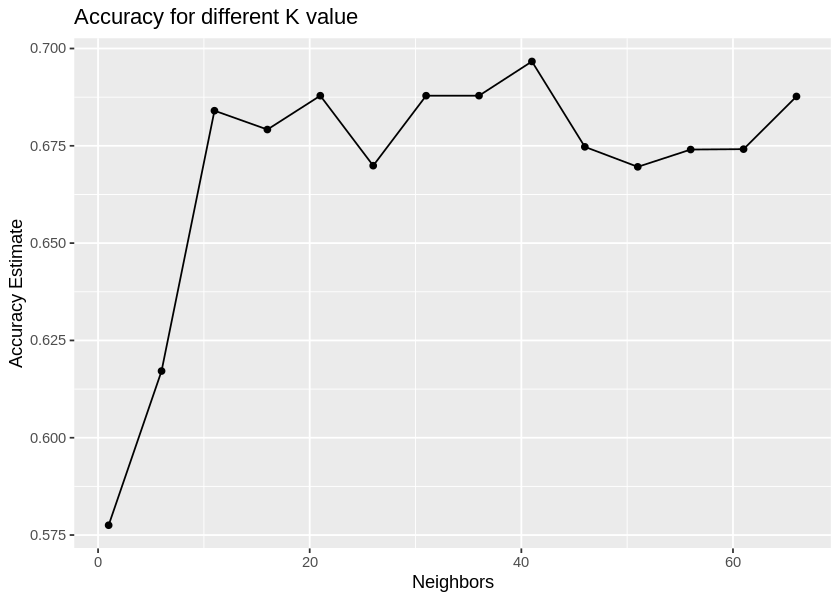

In [12]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate")  +
        ggtitle("Accuracy for different K value")

accuracy_versus_k

Best K value:

In [13]:
best_k <- knn_results |>
    filter(mean == max(mean)) |>
    pull(neighbors)

best_k

[1] 41

In [14]:
best_k_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
      set_engine("kknn") |>
      set_mode("classification")

best_k_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(best_k_spec) |>
  fit(data = heart_train)

Testing and calculate accuracy:

In [15]:
predictions <- predict(best_k_fit , heart_test) |>
       bind_cols(heart_test) |>
        mutate(heart_disease = as_factor(heart_disease))

metrics <- predictions |>
        metrics(truth = heart_disease, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        pull(.estimate)

conf_mat <- predictions |> 
      conf_mat(truth = heart_disease, estimate = .pred_class)

predictions
metrics
conf_mat

.pred_class,age,trestbps,chol,thalach,num,heart_disease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
yes,63,145,233,150,0,no
yes,67,160,286,108,2,yes
no,37,130,250,187,0,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮
no,55,132,342,166,0,no
yes,57,140,241,123,1,yes
no,57,130,236,174,1,yes


[1] 0.6315789

          Truth
Prediction no yes
       no  29  16
       yes 12  19